### Sentiment Analysis on Reddit Data (Posts and Comments).

Authors:
- Md. Hefzul **Bari**
- **Sakin** Amin Khan
- Syed **Falahuddin** Quadri

Instructor(s):
- Himanshu Patel (PhD)

In [83]:
# %run script.py

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
df_posts=pd.read_csv('reddit_posts.csv')
df_comments=pd.read_csv('reddit_comments.csv')

# dropping index column, inplace
df_comments.drop(['Unnamed: 0'], axis=1, inplace=True)
df_posts.drop(['Unnamed: 0'], axis=1, inplace=True)

In [86]:
print("Original POSTS COLUMNS: ", df_posts.columns)
print("Original COMMENTS COLUMNS: ", df_comments.columns)

Original POSTS COLUMNS:  Index(['titles', 'post_text', 'ids', 'ups', 'downs', 'upvote_ratio',
       'posted_on', 'num_comments', 'author', 'score', 'subreddit'],
      dtype='object')
Original COMMENTS COLUMNS:  Index(['post_id', 'id', 'comments', 'author', 'score', 'ups', 'downs',
       'posted_on', 'controversiality'],
      dtype='object')


In [87]:
print(f"Unique values in downs column: {df_posts.downs.unique()}")
# calculating downs, as by default reddit only shows ups and upvote_ratio
df_posts['downs']=(df_posts.ups*(1-df_posts.upvote_ratio)).astype(int)

# there is no upvote ratio in comments, so its not reliably possible to calculate downs

Unique values in downs column: [0]


In [125]:
print("Checking number of null values in each column of both dataframes \n")
print("COMMENTS: \n", df_comments.isna().sum())
print()
print("POSTS: \n", df_posts.isna().sum())

Checking number of null values in each column of both dataframes 

COMMENTS: 
 post_id             0
id                  0
comments            0
author              0
score               0
ups                 0
downs               0
posted_on           0
controversiality    0
dtype: int64

POSTS: 
 titles           0
post_text       93
ids              0
ups              0
downs            0
upvote_ratio     0
posted_on        0
num_comments     0
author           0
score            0
subreddit        0
dtype: int64


In [81]:
df_posts

,titles,post_text,ids,ups,downs,upvote_ratio,posted_on,num_comments,author,score,subreddit
0,Auto valet parking with robots and artificial ...,NaN,149aqec,17752,1065,0.94,2023-06-14,831,Knight_TheRider,17752,nextfuckinglevel
1,[OC] Artificial Intelligence hype is currently...,NaN,17bhnjv,8464,931,0.89,2023-10-19,1140,veleros,8464,dataisbeautiful
2,ChatGPT is just the beginning: Artificial inte...,NaN,10qvt8l,14961,2094,0.86,2023-02-01,2132,Gari_305,14961,Futurology
3,Please help me do something with the fear of ...,I have felt great anxiety because of how quick...,15g6hr4,26,6,0.74,2023-08-02,77,asderflyy,26,writing
4,What is the current state of artificial intell...,Hi /r/compsci not sure if this is the most ap...,kphki,19,4,0.77,2011-09-23,31,kevelev,19,compsci
...,...,...,...,...,...,...,...,...,...,...,...
95,Nasa to hold major announcement after artifici...,NaN,7j1w9l,29801,2682,0.91,2017-12-11,1273,lughnasadh,29801,Futurology
96,Artificial intelligence finds surprising patte...,NaN,kbib09,5662,113,0.98,2020-12-11,291,Aeromarine_eng,5662,Futurology
97,What’s the opposite of artificial intelligence?,Natural stupidity!,13d3xo9,830,107,0.87,2023-05-09,161,no_bon3s_about_it,830,Jokes
98,Artificial intelligence helping NASA design th...,NaN,hj97z5,8254,742,0.91,2020-07-01,271,Sorin61,8254,space


C:\Users\sdfal\AppData\Local\Temp\ipykernel_19564\1514651812.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


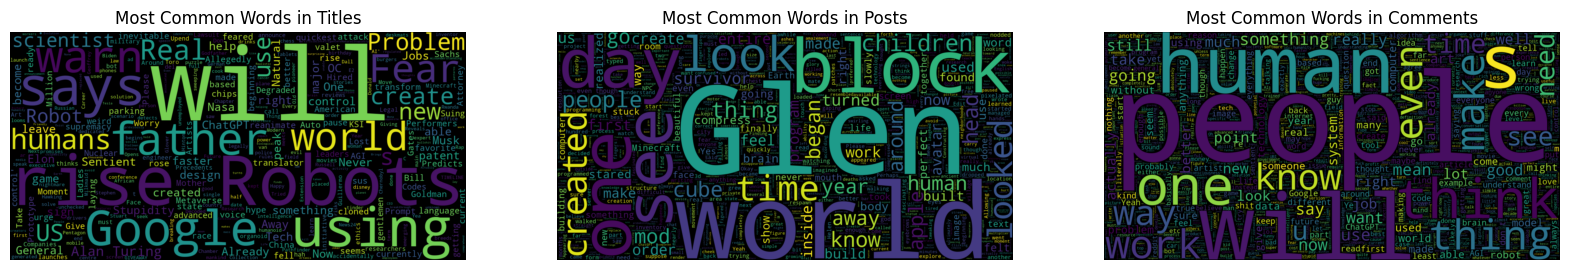

In [124]:
from wordcloud import WordCloud,STOPWORDS

#plotting wordclouds for titles, post_text and comments to see most common words

stopWordsList = ["artificial","intelligence","artificial intelligence","ai","machine","learning","ml","deep","neural","network","nan","null"]
for i in stopWordsList:
    STOPWORDS.add(i)

# plt.figure(figsize = (20,20))
f, (ax1, ax2,ax3) = plt.subplots(1,3, figsize = (20,15))
title_wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(str(v) for v in df_posts.titles.values)))
post_text_wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(str(v) for v in df_posts.post_text.values)))
comments_wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(str(v) for v in df_comments.comments.values)))

ax1.set_title('Most Common Words in Titles')
ax1.imshow(title_wc,interpolation = 'bilinear')
ax1.axis('off')

ax2.set_title('Most Common Words in Posts')
ax2.imshow(post_text_wc,interpolation = 'bilinear')
ax2.axis('off')

ax3.set_title('Most Common Words in Comments')
ax3.imshow(comments_wc,interpolation = 'bilinear')
ax3.axis('off')
f.show()
